In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
import numpy as np
from Plotter import *
from FFNN import FFNN

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(np.int32)

np.random.seed(42)
indices = np.random.choice(len(X), 20000, replace=False)
X = X[indices]
y = y[indices]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

y_one_hot = np.zeros((len(y), 10))
y_one_hot[np.arange(len(y)), y] = 1

X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

plotter = Plotter()

In [3]:
ffnn1 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=False,
    init_type='he',
    seed=69420
)
ffnn1.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn1.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|████████████████████████████████████| 438/438 [00:02<00:00, 178.84it/s, loss=0.634]


Train Loss: 0.6338 - Val Loss: 0.6284


Epoch 2/20: 100%|████████████████████████████████████| 438/438 [00:02<00:00, 167.94it/s, loss=0.627]


Train Loss: 0.6266 - Val Loss: 0.6220


Epoch 3/20: 100%|████████████████████████████████████| 438/438 [00:02<00:00, 162.18it/s, loss=0.621]


Train Loss: 0.6206 - Val Loss: 0.6166


Epoch 4/20: 100%|████████████████████████████████████| 438/438 [00:02<00:00, 170.30it/s, loss=0.615]


Train Loss: 0.6153 - Val Loss: 0.6117


Epoch 5/20: 100%|██████████████████████████████████| 438/438 [00:00<00:00, -9848.11it/s, loss=0.611]


Train Loss: 0.6105 - Val Loss: 0.6071


Epoch 6/20: 100%|████████████████████████████████████| 438/438 [00:02<00:00, 175.63it/s, loss=0.606]


Train Loss: 0.6061 - Val Loss: 0.6028


Epoch 7/20: 100%|████████████████████████████████████| 438/438 [00:02<00:00, 151.27it/s, loss=0.602]


Train Loss: 0.6019 - Val Loss: 0.5986


Epoch 8/20: 100%|████████████████████████████████████| 438/438 [00:02<00:00, 184.49it/s, loss=0.598]


Train Loss: 0.5978 - Val Loss: 0.5946


Epoch 9/20: 100%|████████████████████████████████████| 438/438 [00:02<00:00, 167.60it/s, loss=0.594]


Train Loss: 0.5938 - Val Loss: 0.5906


Epoch 10/20: 100%|████████████████████████████████████| 438/438 [00:02<00:00, 177.36it/s, loss=0.59]


Train Loss: 0.5900 - Val Loss: 0.5868


Epoch 11/20: 100%|███████████████████████████████████| 438/438 [00:02<00:00, 176.29it/s, loss=0.586]


Train Loss: 0.5862 - Val Loss: 0.5830


Epoch 12/20: 100%|███████████████████████████████████| 438/438 [00:02<00:00, 154.99it/s, loss=0.582]


Train Loss: 0.5825 - Val Loss: 0.5792


Epoch 13/20: 100%|███████████████████████████████████| 438/438 [00:02<00:00, 185.19it/s, loss=0.579]


Train Loss: 0.5788 - Val Loss: 0.5756


Epoch 14/20: 100%|███████████████████████████████████| 438/438 [00:02<00:00, 186.10it/s, loss=0.575]


Train Loss: 0.5752 - Val Loss: 0.5719


Epoch 15/20: 100%|███████████████████████████████████| 438/438 [00:02<00:00, 173.08it/s, loss=0.572]


Train Loss: 0.5716 - Val Loss: 0.5683


Epoch 16/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 131.75it/s, loss=0.568]


Train Loss: 0.5680 - Val Loss: 0.5647


Epoch 17/20: 100%|███████████████████████████████████| 438/438 [00:00<00:00, 510.01it/s, loss=0.565]


Train Loss: 0.5646 - Val Loss: 0.5612


Epoch 18/20: 100%|███████████████████████████████████| 438/438 [00:02<00:00, 161.20it/s, loss=0.561]


Train Loss: 0.5611 - Val Loss: 0.5577


Epoch 19/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 145.57it/s, loss=0.558]


Train Loss: 0.5577 - Val Loss: 0.5542


Epoch 20/20: 100%|███████████████████████████████████| 438/438 [00:02<00:00, 147.02it/s, loss=0.554]


Train Loss: 0.5543 - Val Loss: 0.5508
Akurasi: 64.80%


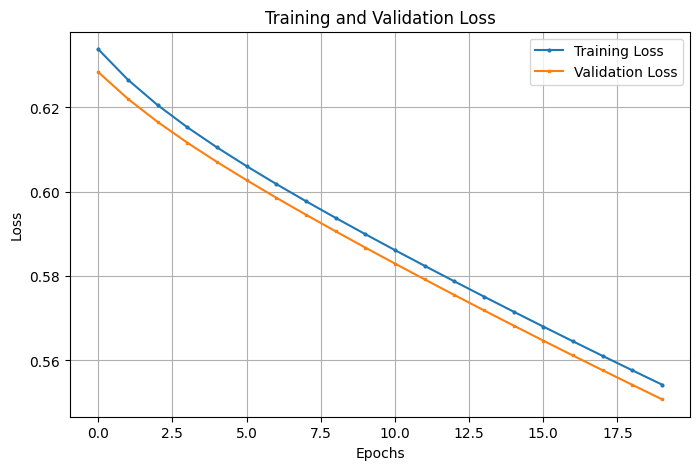

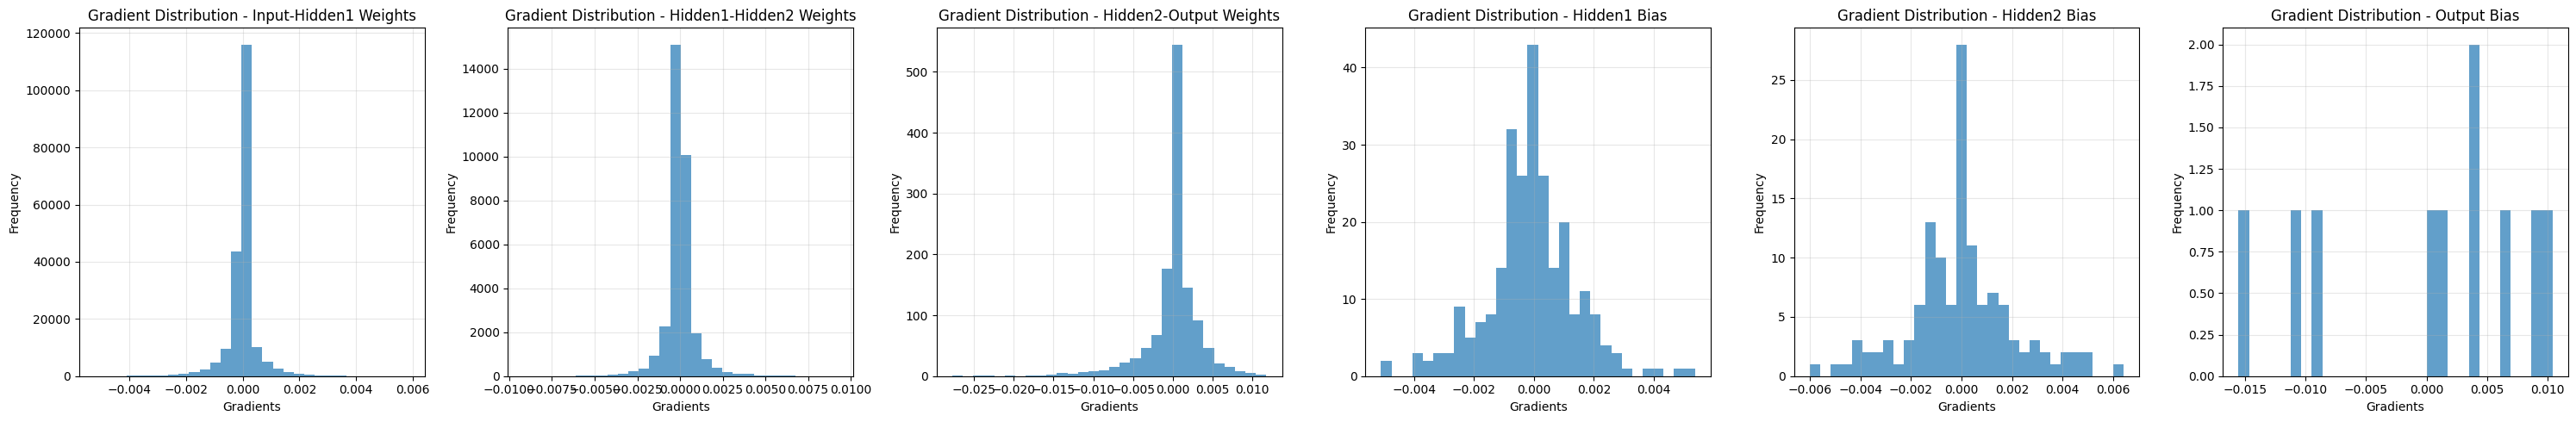

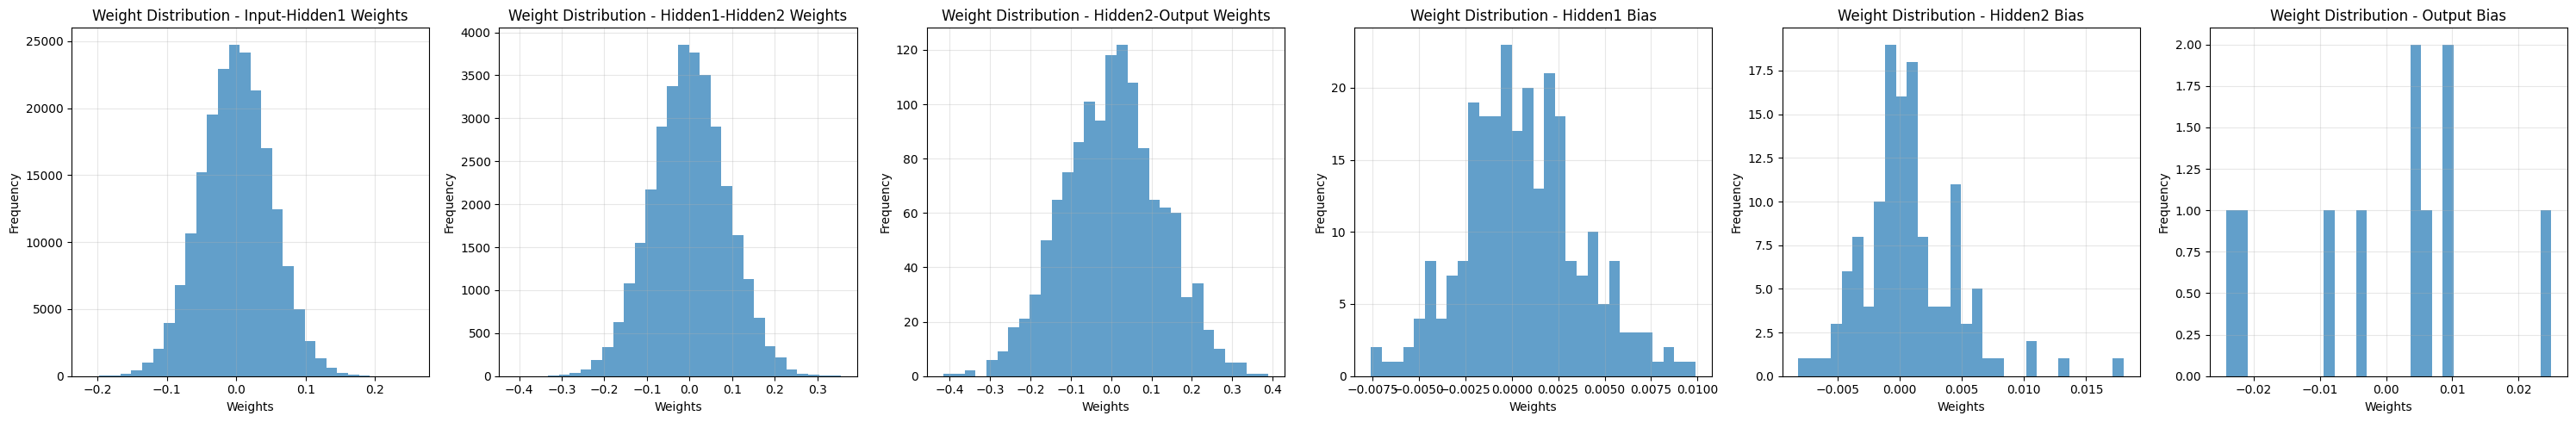

In [4]:
plotter.plot_training_history(ffnn1)
plotter.plot_gradient_distributions(ffnn1)
plotter.plot_weight_distributions(ffnn1)

In [5]:
ffnn2 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn2.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn2.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 124.02it/s, loss=0.182]


Train Loss: 0.1819 - Val Loss: 0.0868


Epoch 2/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 119.96it/s, loss=0.0739]


Train Loss: 0.0739 - Val Loss: 0.0640


Epoch 3/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 128.94it/s, loss=0.0628]


Train Loss: 0.0628 - Val Loss: 0.0593


Epoch 4/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 126.20it/s, loss=0.0598]


Train Loss: 0.0598 - Val Loss: 0.0576


Epoch 5/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 132.12it/s, loss=0.0584]


Train Loss: 0.0584 - Val Loss: 0.0566


Epoch 6/20: 100%|███████████████████████████████████| 438/438 [00:01<00:00, 306.37it/s, loss=0.0575]


Train Loss: 0.0575 - Val Loss: 0.0558


Epoch 7/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 106.31it/s, loss=0.0568]


Train Loss: 0.0568 - Val Loss: 0.0555


Epoch 8/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 111.21it/s, loss=0.0562]


Train Loss: 0.0562 - Val Loss: 0.0551


Epoch 9/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 100.67it/s, loss=0.0557]


Train Loss: 0.0557 - Val Loss: 0.0548


Epoch 10/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 114.55it/s, loss=0.0553]


Train Loss: 0.0553 - Val Loss: 0.0545


Epoch 11/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 129.22it/s, loss=0.055]


Train Loss: 0.0550 - Val Loss: 0.0544


Epoch 12/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 107.35it/s, loss=0.0547]


Train Loss: 0.0547 - Val Loss: 0.0541


Epoch 13/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 92.72it/s, loss=0.0544]


Train Loss: 0.0544 - Val Loss: 0.0538


Epoch 14/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 218.80it/s, loss=0.0542]


Train Loss: 0.0542 - Val Loss: 0.0536


Epoch 15/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 102.36it/s, loss=0.054]


Train Loss: 0.0540 - Val Loss: 0.0535


Epoch 16/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 104.29it/s, loss=0.0538]


Train Loss: 0.0538 - Val Loss: 0.0534


Epoch 17/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 116.77it/s, loss=0.0537]


Train Loss: 0.0537 - Val Loss: 0.0534


Epoch 18/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 115.78it/s, loss=0.0536]


Train Loss: 0.0536 - Val Loss: 0.0533


Epoch 19/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 114.43it/s, loss=0.0535]


Train Loss: 0.0535 - Val Loss: 0.0533


Epoch 20/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 122.82it/s, loss=0.0534]


Train Loss: 0.0534 - Val Loss: 0.0533
Akurasi: 93.87%


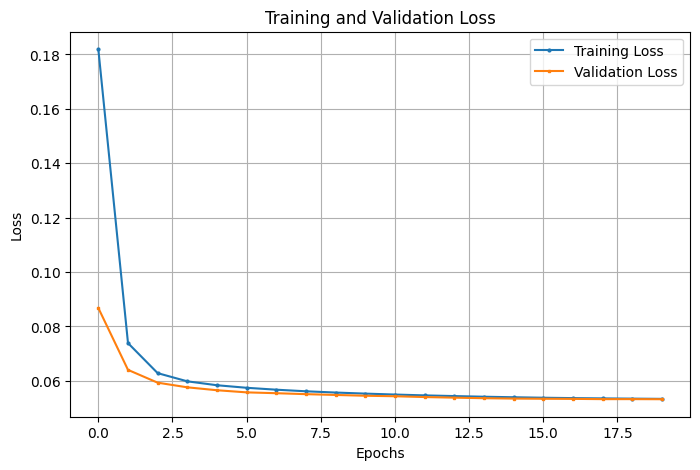

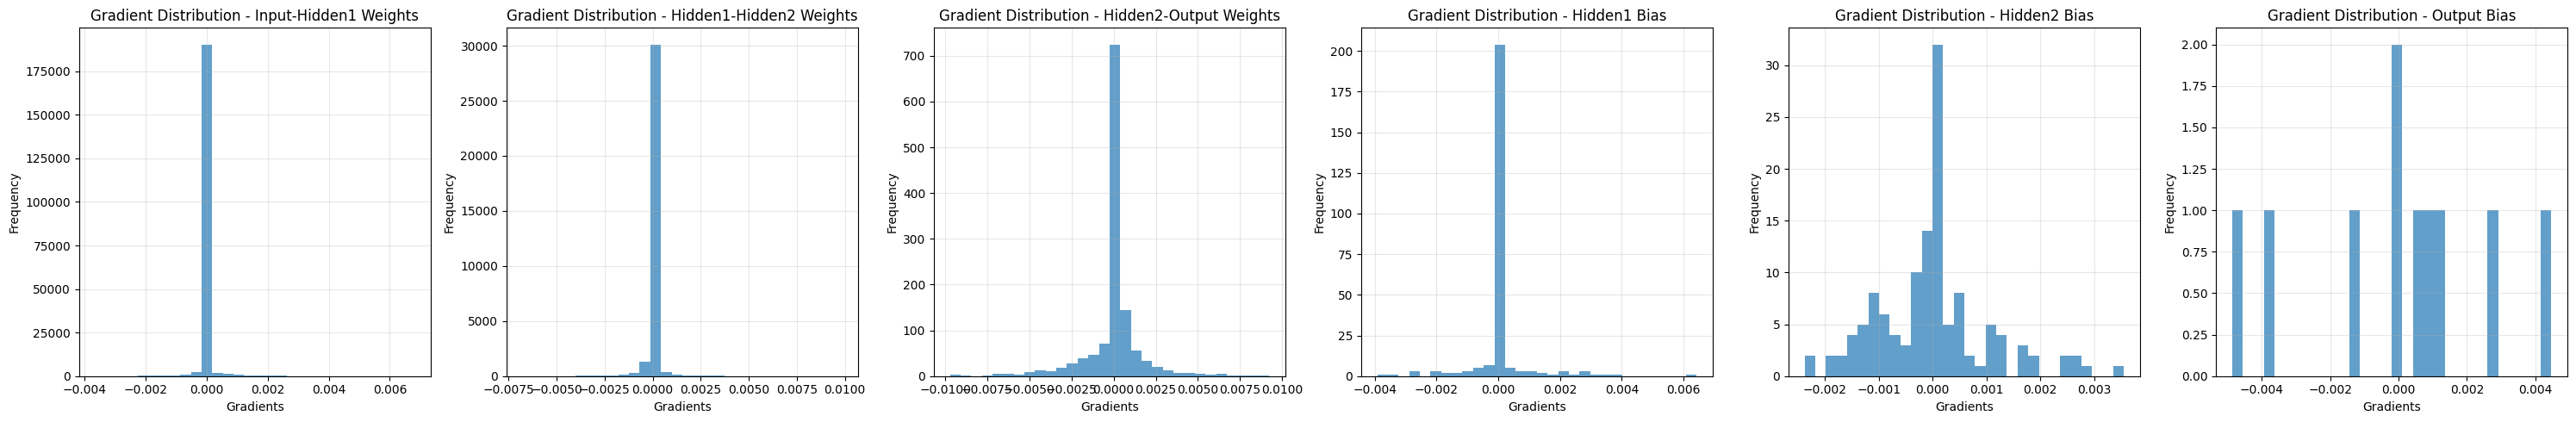

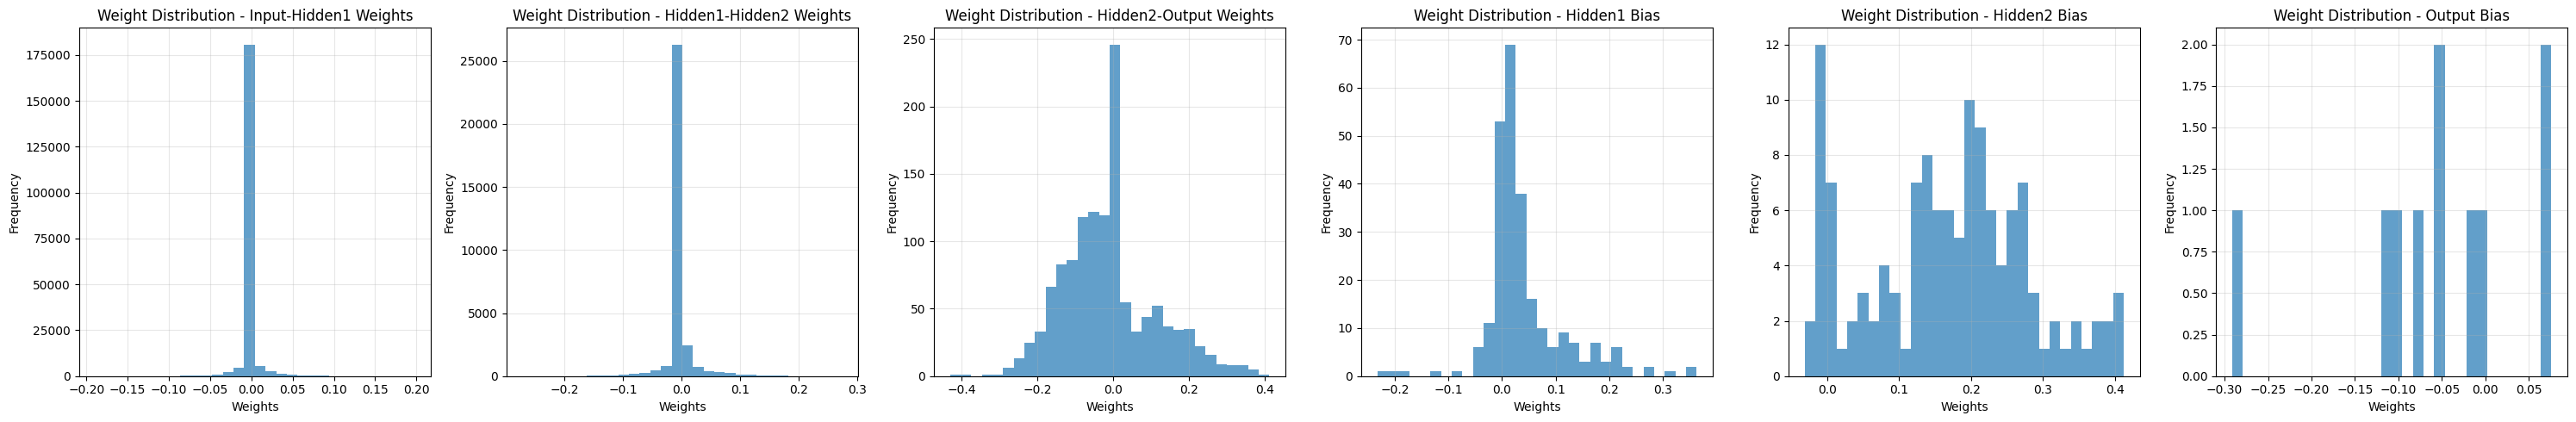

In [6]:
plotter.plot_training_history(ffnn2)
plotter.plot_gradient_distributions(ffnn2)
plotter.plot_weight_distributions(ffnn2)